# **Amaya Eshia - 0110224102 - 24TI06 - AI02**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ***# Load Data***

In [6]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# MEmanggil dataset via gdrive
path = "/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 7 (Review)/Data/dataset_satelit.csv"

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 7 (Review)/Data/dataset_satelit.csv')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [10]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [11]:
df.columns

Index(['No', 'Longitude', 'Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh'],
      dtype='object')

In [12]:
# Ubah kolom Mg ke float

df['Mg'] = pd.to_numeric(df['Mg'], errors='coerce')

# Hilangkan baris yang ada missing value
df = df.dropna()

# ***Feature Selection***

In [13]:
# x = df[['b2','b3','b4','b8','b11','Sigma_VV','Sigma_VH']]
# y = df['N']

In [14]:
x = df[['P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh']]

y = df['N']

# ***Splitting Data***

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# ***MACHINE***

In [17]:
# Testing
y_pred = model.predict(x_test)

# EValuasi Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score :", r2)
print("RMSE :", mse)

R2 Score : 0.7549955124484078
RMSE : 0.037605716475545996


In [18]:
coeff = pd.DataFrame({
    'Fitur' : x.columns,
    'Koefisien' : model.coef_
})

print(coeff)

        Fitur  Koefisien
0           P   8.570837
1           K   0.056014
2          Ca  -0.058380
3          Mg  -0.161095
4          Fe   0.000284
5          Mn   0.000177
6          Cu   0.023202
7          Zn   0.002968
8           B  -0.002092
9         b12   0.327312
10        b11  -0.619437
11         b9  -0.047586
12        b8a   0.064453
13         b8  -0.072659
14         b7   0.981186
15         b6  -0.864947
16         b5  -0.329397
17         b4   1.420614
18         b3  -0.449043
19         b2  -0.357454
20         b1  -0.033418
21   Sigma_VV   0.156595
22   Sigma_VH  -1.466200
23       plia   0.021315
24        lia  -0.021906
25       iafe  -0.078122
26  gamma0_vv   0.457327
27  gamma0_vh   2.946416
28   beta0_vv  -0.569281
29   beta0_vh  -0.677599


In [19]:
import statsmodels.api as sm

x_sm = sm.add_constant(x)
model_ols = sm.OLS(y, x_sm).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     66.10
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          6.69e-163
Time:                        14:45:07   Log-Likelihood:                 156.68
No. Observations:                 592   AIC:                            -251.4
Df Residuals:                     561   BIC:                            -115.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8681      0.864      4.479      0.0


Visualisasi Hasil Model


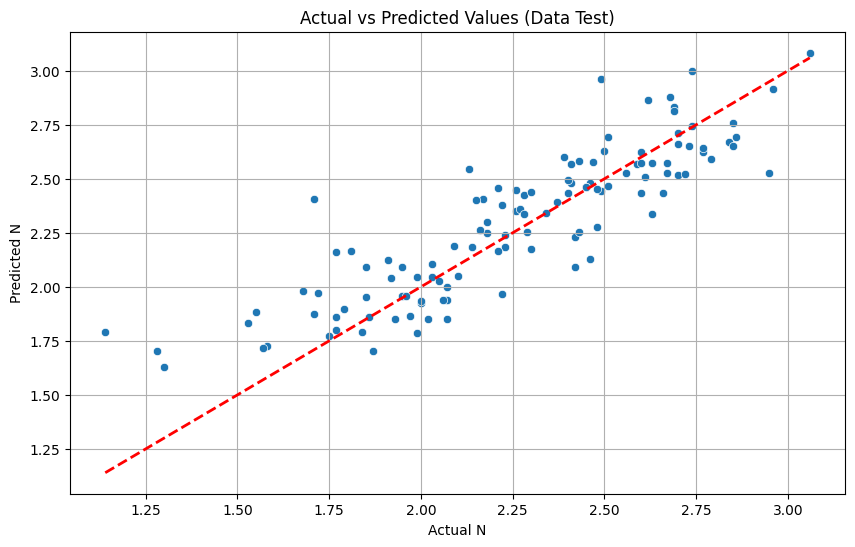

In [20]:
import matplotlib.pyplot as plt

print("\nVisualisasi Hasil Model")

# 1. Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
# Plot titik-titik data (aktual vs prediksi)
sns.scatterplot(x=y_test, y=y_pred)
# Plot garis diagonal merah (x=y) sebagai referensi
# Jika titik-titik mendekati garis ini, prediksinya bagus
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values (Data Test)')
plt.xlabel('Actual N')
plt.ylabel('Predicted N')
plt.grid(True)
plt.show()


 Analisis Residual (pada Data Training)


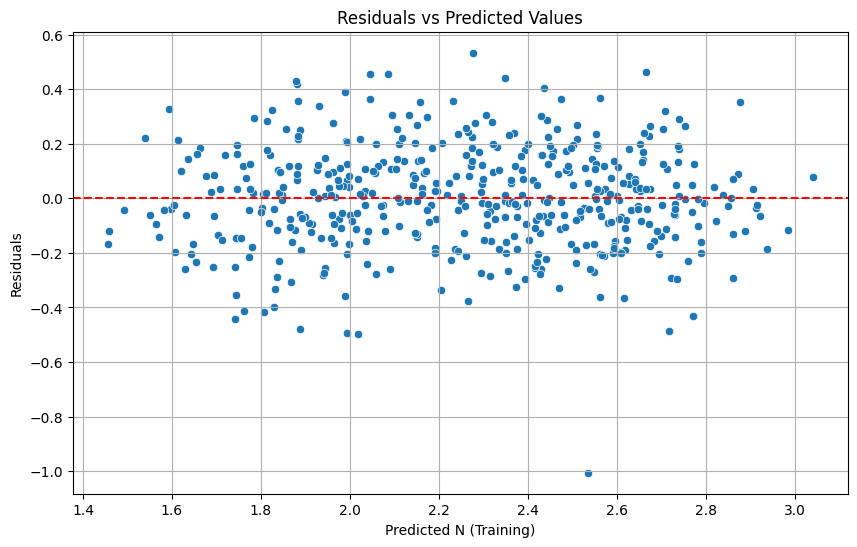

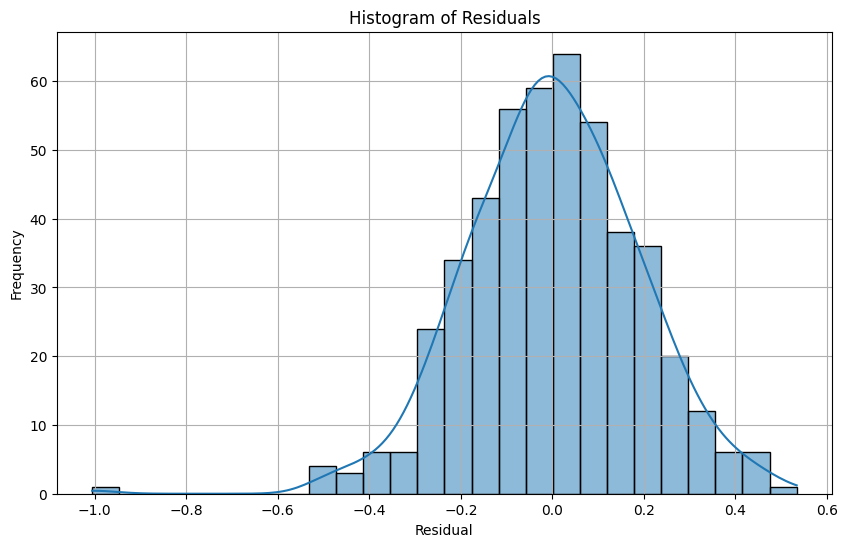

In [21]:
# Analisis Residual (pada Data Training)
# Kita perlu prediksi pada data training untuk analisis residual
y_train_pred = model.predict(x_train)
residuals = y_train - y_train_pred

print("\n Analisis Residual (pada Data Training)")

# Plot Residuals vs Predicted
# Cek asumsi Homoskedastisitas (varian error konstan)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--') # Garis horizontal di y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted N (Training)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Histogram Residuals
# Mengecek asumsi Normalitas (error terdistribusi normal)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()